[EDA](eda.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
                                   QuantileTransformer,
                                   Normalizer,
                                   MinMaxScaler,
                                   RobustScaler,
                                   PowerTransformer)

from sklearn.linear_model import (Lars,
                                  Ridge,
                                  Lasso,
                                  LarsCV,
                                  LassoCV,
                                  RidgeCV,
                                  LassoLars,
                                  ElasticNet,
                                  LassoLarsCV,
                                  LassoLarsIC,
                                  ElasticNetCV,
                                  SGDRegressor,
                                  LinearRegression,
                                  OrthogonalMatchingPursuit,
                                  OrthogonalMatchingPursuitCV)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

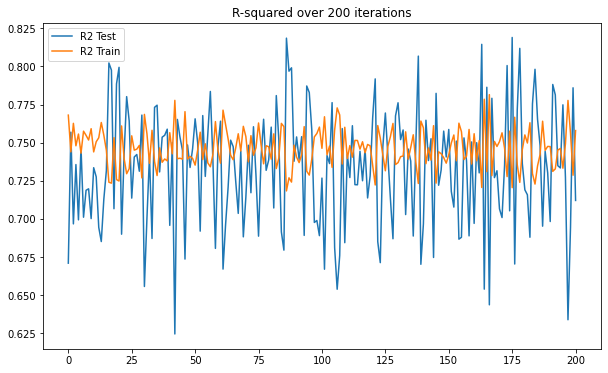

|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.62 | Min:0.72 |  Min: 3.24  |  Min:3.57  |
| Avg: 0.73 | Avg:0.75 |  Avg: 4.01  |  Avg:3.93  |
| Max: 0.82 | Max:0.78 |  Max: 5.04  |  Max:4.15  |



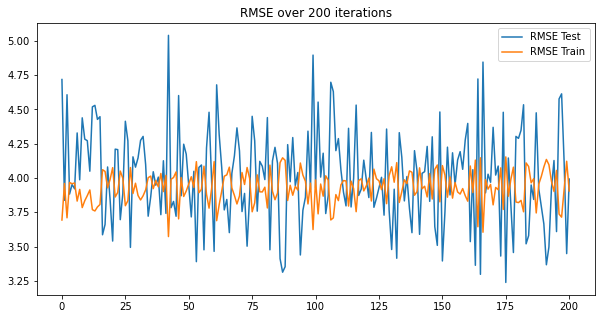

Truck Avg: 16.23
Mustang Avg: 20.68
Grom Avg: 36.07
Burb Avg: 15.86
Corolla Avg: 21.06
Steve Avg: 16.37


In [2]:
X = pd.read_csv('data/X.csv')
y = pd.read_csv('data/y.csv').mpg

eff = 1

v6_s197_05_hp = 216
v6_s197_05_ci = 245
v6_s197_05_cl = 6
v6_s197_05_weight = 3300
v6_s197_05_eff = (v6_s197_05_hp/\
                  v6_s197_05_ci)*eff
v6_s197_05 = {'horsepower':v6_s197_05_hp,
               'bore_size':v6_s197_05_ci/v6_s197_05_cl,
                  'grunt':(v6_s197_05_ci/v6_s197_05_cl)/v6_s197_05_eff,
                    'load':v6_s197_05_ci/v6_s197_05_weight}
mustang_hp = 400
mustang_ci = 302
mustang_cl = 8
mustang_weight = 3600
mustang_eff = (mustang_hp/\
               mustang_ci)*eff
mustang = {'horsepower':mustang_hp,
            'bore_size':mustang_ci/mustang_cl,
               'grunt':(mustang_ci/mustang_cl)/mustang_eff,
                 'load':mustang_ci/mustang_weight}
corolla_hp = 140
corolla_ci = 110
corolla_cl = 4
corolla_weight = 2800
corolla_eff = (corolla_hp/\
               corolla_ci)*eff
corolla = {'horsepower':corolla_hp,
            'bore_size':corolla_ci/corolla_cl,
               'grunt':(corolla_ci/corolla_cl)/corolla_eff,
                 'load':corolla_ci/corolla_weight}
truck_hp = 500
truck_ci = 359
truck_cl = 6
truck_weight = 6500
truck_eff = (truck_hp/\
             truck_ci)*eff
truck = {'horsepower':truck_hp,
          'bore_size':truck_ci/truck_cl,
             'grunt':(truck_ci/truck_cl)/truck_eff,
               'load':truck_ci/truck_weight}
grom_hp = 12
grom_ci = 7.6
grom_cl = 1
grom_weight = 400
grom_eff = (grom_hp/\
            grom_ci)*eff
grom = {'horsepower':grom_hp,
         'bore_size':grom_ci/grom_cl,
            'grunt':(grom_ci/grom_cl)/grom_eff,
              'load':grom_ci/grom_weight}
burb_hp = 320
burb_ci = 325
burb_cl = 8
burb_weight = 6000
burb_eff = (burb_hp/\
            burb_ci)*eff
burb = {'horsepower':burb_hp,
         'bore_size':burb_ci/burb_cl,
            'grunt':(burb_ci/burb_cl)/burb_eff,
              'load':burb_ci/burb_weight}

mdf = pd.DataFrame(mustang,index=[0])
cdf = pd.DataFrame(corolla,index=[0])
tdf = pd.DataFrame(truck,index=[0])
gdf = pd.DataFrame(grom,index=[0])
bdf = pd.DataFrame(burb,index=[0])
sm5 = pd.DataFrame(v6_s197_05,index=[0])

mustang_predicts = []
corolla_predicts = []
truck_predicts = []
grom_predicts = []
burb_predicts = []
v6_s197_05_predicts = []

r2_test_list = []
r2_train_list = []
rmse_test_list = []
rmse_train_list = []

for i in range(201):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    pipe = Pipeline([
        # ('minmax', MinMaxScaler()),
        # ('ss', StandardScaler()),
        ('qt', QuantileTransformer(n_quantiles=297)),
        # ('rob', RobustScaler()),
        
        ('linreg', LinearRegression()),
        # ('lasso', Lasso()),
        # ('lassocv', LassoCV()),
        # ('ridge', Ridge()),
        # ('ridgeCV', RidgeCV),
        # ('lsvr', LinearSVR())
    ])

    model = pipe.fit(X_train,y_train)
    test_predict = model.predict(X_test)
    train_predict = model.predict(X_train)

    r2_test = r2_score(y_test, test_predict)
    r2_train = r2_score(y_train, train_predict)
    rmse_test = mean_squared_error(y_test, test_predict ,squared=False)
    rmse_train = mean_squared_error(y_train, train_predict ,squared=False)

    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)
    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)
    truck_predicts.append(model.predict(tdf)[0])
    mustang_predicts.append(model.predict(mdf)[0])
    grom_predicts.append(model.predict(gdf)[0])
    burb_predicts.append(model.predict(bdf)[0])
    corolla_predicts.append(model.predict(cdf)[0])
    v6_s197_05_predicts.append(model.predict(sm5)[0])

plt.subplots(figsize=(10,6))
plt.title('R-squared over 200 iterations')
plt.plot(r2_test_list,label='R2 Test')
plt.plot(r2_train_list,label='R2 Train')
plt.legend()
plt.show();

avg = np.mean
print(f'''|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: {min(r2_test_list):.2f} | Min:{min(r2_train_list):.2f} |  Min: {min(rmse_test_list):.2f}  |  Min:{min(rmse_train_list):.2f}  |
| Avg: {avg(r2_test_list):.2f} | Avg:{avg(r2_train_list):.2f} |  Avg: {avg(rmse_test_list):.2f}  |  Avg:{avg(rmse_train_list):.2f}  |
| Max: {max(r2_test_list):.2f} | Max:{max(r2_train_list):.2f} |  Max: {max(rmse_test_list):.2f}  |  Max:{max(rmse_train_list):.2f}  |
''')
plt.subplots(figsize=(10,5))
plt.title('RMSE over 200 iterations')
plt.plot(rmse_test_list,label='RMSE Test')
plt.plot(rmse_train_list,label='RMSE Train')
plt.legend()
plt.show();

print(f'Truck Avg: {avg(truck_predicts):.2f}')
print(f'Mustang Avg: {avg(mustang_predicts):.2f}')
print(f'Grom Avg: {avg(grom_predicts):.2f}')
print(f'Burb Avg: {avg(burb_predicts):.2f}')
print(f'Corolla Avg: {avg(corolla_predicts):.2f}')
print(f'Steve Avg: {avg(v6_s197_05_predicts):.2f}')

After testing lots of models, scalers, and experimenting with different mixtures of features, I've come to the conclusion that it's futile.

It's cliché, but at under 400 rows I think I can complain about not having enough data.

QuantileTransformer is the heavy lifter and the model really doesn't seem to matter so long as it's linear. In fact, the scores go down as the models get fancier. I think because it's overthinking such a small data set, it's making connections that are coincidental.

The best metric I found was to make predictions on my own vehicles, in other words it's unseen data that I could just pull from nothing. I had used model year as a feature and it seemed to perform quite well until I introduced a 2012, it predicted MPG into the hundreds. I think model year would be a great feature if the data spanned across decades and there was good representation. It could probably even be made categorical as it would be an indicator of tech advancing over decades. All of the vehicles here are more or less in the same "tech era" but the model did seem to find a signal. At any rate it's too unstable if used with data outside the training set.

My personal vehicle predictions are actually quite close. They're a bit on the lower end, but also consider that neither one is even close to being represented in the training data. My truck is a turbo diesel (boost to efficiency) and my car is gas but has some fancy cam phasing and electronic fuel injection. Basically they have higher efficiency compared to anything in the training set.